In [144]:
import pandas as pd 
import patsy
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from feature_model import FeatureModel
import contextlib
from sklearn.preprocessing import StandardScaler

In [145]:
from ce1_compare import compare, set_name, write_submission_txt, set_idm

In [146]:
set_name("Thao", "Nguyen Van")
set_idm("ic87adyh")

# CE1 (Inherently explainable models part 1)
    - 1.1 Taking a look at the data: The bike dataset
        - 1.1.1 Fitting a RandomForestRegressor but something seems off..
            - Can you explain please?
        - 1.1.2 Finding the mistake through correlations
    - 1.2 Linear Modeling
        - 1.2.1 The intercept feature
        - 1.2.2 Re-scaling and shifting numerical features: Standardization
        - 1.2.3 Categorical encodings
        
    - Exercises/Homework:
        - 1.1 Standardising data
        - 1.2 LASSO-Regularisation
        - 1.3 Effect plot
        - 1.4 Feature engineering: Adding feature interaction 
        - 1.5 Feature engineering: Custom basis functions 


### 1.1.0 The bike dataset

In [147]:
bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")

In [148]:
bike_data.df

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1   0     1        0        6           0           2  8.175849   
1         1   0     1        0        0           0           2  9.083466   
2         1   0     1        0        1           1           1  1.229108   
3         1   0     1        0        2           1           1  1.400000   
4         1   0     1        0        3           1           1  2.666979   
..      ...  ..   ...      ...      ...         ...         ...       ...   
726       1   1    12        0        4           1           2  3.945849   
727       1   1    12        0        5           1           2  3.906651   
728       1   1    12        0        6           0           2  3.906651   
729       1   1    12        0        0           0           1  4.024151   
730       1   1    12        0        1           1           2  2.144151   

          hum  windspeed  casual  registered   cnt  days_since_01_01_2011  
0    0.805833   0.160446     331         654   985                      0  
1    0.696087   0.248539     131         670   801                      1  
2    0.437273   0.248309     120        1229  1349                      2  
3    0.590435   0.160296     108        1454  1562                      3  
4    0.436957   0.186900      82        1518  1600                      4  
..        ...        ...     ...         ...   ...                    ...  
726  0.652917   0.350133     247        1867  2114                    726  
727  0.590000   0.155471     644        2451  3095                    727  
728  0.752917   0.124383     159        1182  1341                    728  
729  0.483333   0.350754     364        1432  1796                    729  
730  0.577500   0.154846     439        2290  2729                    730  

[731 rows x 14 columns]

#### Let's check out the `datasets/bike/readme.txt` to find out what all these columns represent

In [149]:
bike_data.add_target("cnt")

FeatureModel(->Not fully specified yet!)


In [150]:
bike_data.add_all_features_but_target()

FeatureModel(cnt ~ -1 + season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + casual + registered + days_since_01_01_2011 )


In [151]:
X, y = bike_data.return_Xy()

In [152]:
X

season   yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1.0  0.0   1.0      0.0      6.0         0.0         2.0  8.175849   
1       1.0  0.0   1.0      0.0      0.0         0.0         2.0  9.083466   
2       1.0  0.0   1.0      0.0      1.0         1.0         1.0  1.229108   
3       1.0  0.0   1.0      0.0      2.0         1.0         1.0  1.400000   
4       1.0  0.0   1.0      0.0      3.0         1.0         1.0  2.666979   
..      ...  ...   ...      ...      ...         ...         ...       ...   
726     1.0  1.0  12.0      0.0      4.0         1.0         2.0  3.945849   
727     1.0  1.0  12.0      0.0      5.0         1.0         2.0  3.906651   
728     1.0  1.0  12.0      0.0      6.0         0.0         2.0  3.906651   
729     1.0  1.0  12.0      0.0      0.0         0.0         1.0  4.024151   
730     1.0  1.0  12.0      0.0      1.0         1.0         2.0  2.144151   

          hum  windspeed  casual  registered  days_since_01_01_2011  
0    0.805833   0.160446   331.0       654.0                    0.0  
1    0.696087   0.248539   131.0       670.0                    1.0  
2    0.437273   0.248309   120.0      1229.0                    2.0  
3    0.590435   0.160296   108.0      1454.0                    3.0  
4    0.436957   0.186900    82.0      1518.0                    4.0  
..        ...        ...     ...         ...                    ...  
726  0.652917   0.350133   247.0      1867.0                  726.0  
727  0.590000   0.155471   644.0      2451.0                  727.0  
728  0.752917   0.124383   159.0      1182.0                  728.0  
729  0.483333   0.350754   364.0      1432.0                  729.0  
730  0.577500   0.154846   439.0      2290.0                  730.0  

[731 rows x 13 columns]

In [153]:
bike_data.intercept=False

X, y = bike_data.return_Xy()

In [154]:
X

season   yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1.0  0.0   1.0      0.0      6.0         0.0         2.0  8.175849   
1       1.0  0.0   1.0      0.0      0.0         0.0         2.0  9.083466   
2       1.0  0.0   1.0      0.0      1.0         1.0         1.0  1.229108   
3       1.0  0.0   1.0      0.0      2.0         1.0         1.0  1.400000   
4       1.0  0.0   1.0      0.0      3.0         1.0         1.0  2.666979   
..      ...  ...   ...      ...      ...         ...         ...       ...   
726     1.0  1.0  12.0      0.0      4.0         1.0         2.0  3.945849   
727     1.0  1.0  12.0      0.0      5.0         1.0         2.0  3.906651   
728     1.0  1.0  12.0      0.0      6.0         0.0         2.0  3.906651   
729     1.0  1.0  12.0      0.0      0.0         0.0         1.0  4.024151   
730     1.0  1.0  12.0      0.0      1.0         1.0         2.0  2.144151   

          hum  windspeed  casual  registered  days_since_01_01_2011  
0    0.805833   0.160446   331.0       654.0                    0.0  
1    0.696087   0.248539   131.0       670.0                    1.0  
2    0.437273   0.248309   120.0      1229.0                    2.0  
3    0.590435   0.160296   108.0      1454.0                    3.0  
4    0.436957   0.186900    82.0      1518.0                    4.0  
..        ...        ...     ...         ...                    ...  
726  0.652917   0.350133   247.0      1867.0                  726.0  
727  0.590000   0.155471   644.0      2451.0                  727.0  
728  0.752917   0.124383   159.0      1182.0                  728.0  
729  0.483333   0.350754   364.0      1432.0                  729.0  
730  0.577500   0.154846   439.0      2290.0                  730.0  

[731 rows x 13 columns]

### 1.1.1 Fitting a Random Forest Regressor

In [155]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

clf.fit(X, y)

/var/folders/l8/z14nrs8x2l98fl6t2ldv4y0r0000gn/T/ipykernel_8748/1396578033.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


RandomForestRegressor()

In [156]:
clf.score(X, y)

0.9995682971642806

#### Q: What is that score? You may want to check the documentation

The score obstained from clf.score() method on the RandomForestRegressor model is a measure of the model's accuracy or goodness of fit. In this case, the score is 0.999542 shows that the model is able to predict the target variable (y) almost perfectly for the given input features (X).

### 1.1.2 Looking for correlations in the data

In [157]:
bike_data.add_feature("cnt")
X, _ = bike_data.return_Xy()

FeatureModel(cnt ~ -1 + season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + casual + registered + days_since_01_01_2011 + cnt )


In [158]:
sns.set(font_scale = 2)

def correlation_heatmap(X, size=5):
    fig, ax = plt.subplots(figsize=((size+1)*2,size*2))    
    sns.heatmap(np.corrcoef(X.transpose()), cmap="coolwarm", linewidth=0.5, xticklabels=X.columns, yticklabels=X.columns, ax=ax, vmin=-1, vmax=1)

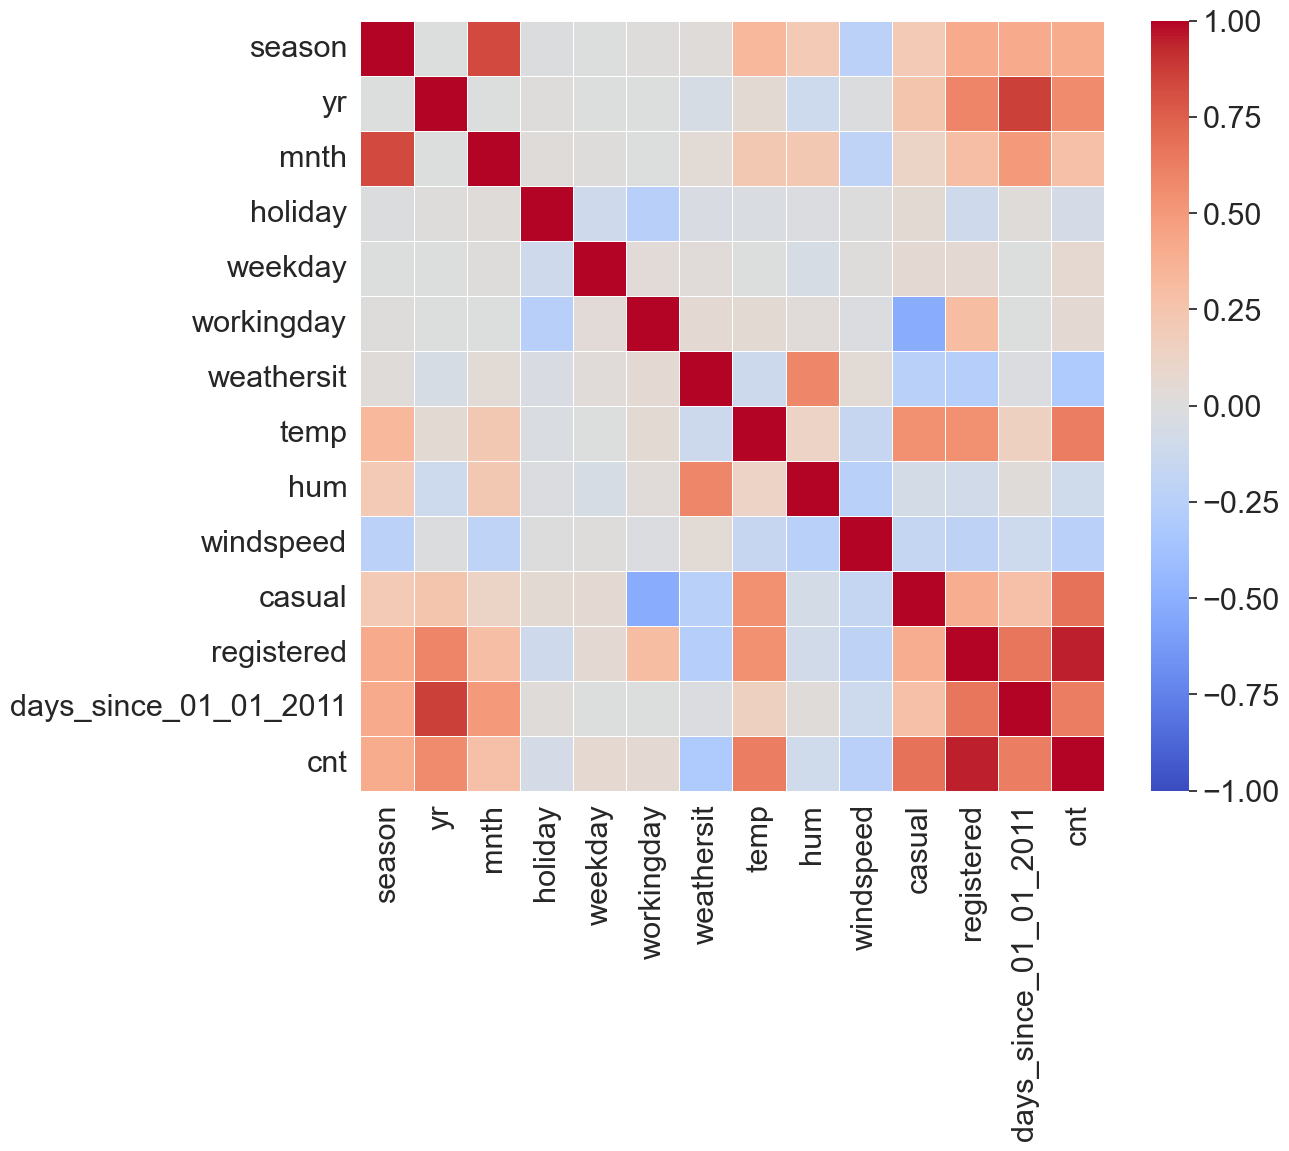

In [159]:
correlation_heatmap(X)

### 1.2.1 The intercept term
Without intercept term a e.g. linear model can not compensate for a target with a shifted mean value / mean value different to zero

In [160]:
bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv", include_intercept_feature=True)
bike_data.add_target("cnt")
bike_data.add_feature("temp")
bike_data.add_feature("days_since_01_01_2011")
bike_data.add_feature("workingday")
X, y = bike_data.return_Xy()

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ 1 + temp )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday )


In [161]:
y.mean()

cnt    4504.348837
dtype: float64

In [162]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression(fit_intercept=False)
regr.fit(X, y)

LinearRegression(fit_intercept=False)

In [163]:
regr.coef_

array([[703.178685  , 122.32509658,   5.01974321, 145.40909362]])

In [164]:
X.columns

Index(['Intercept', 'temp', 'days_since_01_01_2011', 'workingday'], dtype='object')

In [165]:
X, y = bike_data.return_Xy()
regr.fit(X, y)
print(regr.coef_)

[[703.178685   122.32509658   5.01974321 145.40909362]]


### 1.2.2 Rescaling and shifting numerical features

In [166]:
def center_temp(df):
    df.temp = df.temp - df.temp.mean()
    return df 
    
X, y = bike_data.return_Xy(transform_before=center_temp)

In [167]:
regr.fit(X, y)
print(regr.coef_)

[[2572.68354097  122.32509658    5.01974321  145.40909362]]


Notice how only the intercept term changed

Q: 
- What does this intercept value now mean / reflect? 
- What did the intercept value before centering the temperature feature?

Q: 
- What does the temperature weight mean? 
- When interpreting the weight what are you assuming? 
- Is your assumption justified, how could you check (at least an important part that underlies the assumption)? Hint: Correlations

A1: The intercept value after centering the temperature feature represents the predicted value of cnt when all features are equal to their respective means, rather than the constant term of the linear regression model. This means that the intercept value now reflects the difference between the actual mean value of cnt and the predicted value of cnt when all features are at their mean values. In other words, it represents the amount by which cnt is expected to deviate from its mean value when the other features are at their respective means.

The intercept value before centering the temperature feature represented the predicted value of cnt when all features were equal to zero. This means that it represented the expected value of cnt when the other features have no effect on the target variable. However, this assumption is unlikely to be true in practice, and the intercept value before centering the temperature feature should be interpreted with caution.

A2: The temperature weight represents the change in the predicted value of cnt for a unit increase in the temp feature, holding all other features constant. When interpreting the weight, we are assuming that there is a linear relationship between cnt and temp, and that this relationship is independent of the other features in the model. This assumption may not be true in practice, and the interpretation of the weight should be considered in light of this uncertainty.

To check whether the assumption of linearity and independence is justified, we can examine the correlations between the target variable and each of the features. If there is a strong nonlinear relationship between the target variable and a feature, then the assumption of linearity may not be valid. If there is a strong correlation between two features, then the assumption of independence may not be valid. We can use correlation matrices or scatter plots to visualize these relationships and assess the validity of the assumptions.

In [168]:
def standardize_temp(df):
    df.temp = (df.temp - df.temp.mean())/df.temp.std()
    return df 
    
X, y = bike_data.return_Xy(transform_before=standardize_temp)

In [169]:
regr.fit(X, y)
print(regr.coef_)

[[2572.68354097 1052.41134657    5.01974321  145.40909362]]


Q: What is the ratio between the temperature weight before and after standardize?

Q: After standardising numerical features. Is it easier to interpret the weights individually? Is it easier to compare the magnitude of weights to other weigths?

Q: How to obtain a probabilistic estimate of weights?

In [170]:
import statsmodels.api as sm

In [171]:
sm_model = sm.OLS(y, X)

In [172]:
results = sm_model.fit()

In [173]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     532.2
Date:                Sun, 14 May 2023   Prob (F-statistic):          6.71e-183
Time:                        19:14:31   Log-Likelihood:                -6145.0
No. Observations:                 731   AIC:                         1.230e+04
Df Residuals:                     727   BIC:                         1.232e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2572.6835    100.777     25.528      0.000    2374.835    2770.532
temp                   1052.4113     40.712     25.850      0.000     972.485    1132.338
days_since_01_01_2011     5.0197      0.193     26.073      0.000       4.642       5.398
workingday              145.4091     86.511      1.681      0.093     -24.432     315.250
==============================================================================
Omnibus:                      115.305   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.326
Skew:                          -0.887   Prob(JB):                     1.45e-53
Kurtosis:                       5.200   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.2.3 Encoding categorical features

In [174]:
bike_data.df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'days_since_01_01_2011'],
      dtype='object')

In [175]:
def winter(season):
    return (season==1).astype(int)

def spring(season):
    return (season==2).astype(int)

def summer(season):
    return (season==3).astype(int)

In [176]:
bike_data.add_function_feature(winter, "season")
bike_data.add_function_feature(spring, "season")
bike_data.add_function_feature(summer, "season")

FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday + winter(season) )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday + winter(season) + spring(season) )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday + winter(season) + spring(season) + summer(season) )


In [177]:
X, y = bike_data.return_Xy()

In [178]:
X

Intercept      temp  days_since_01_01_2011  workingday  winter(season)  \
0          1.0  8.175849                    0.0         0.0             1.0   
1          1.0  9.083466                    1.0         0.0             1.0   
2          1.0  1.229108                    2.0         1.0             1.0   
3          1.0  1.400000                    3.0         1.0             1.0   
4          1.0  2.666979                    4.0         1.0             1.0   
..         ...       ...                    ...         ...             ...   
726        1.0  3.945849                  726.0         1.0             1.0   
727        1.0  3.906651                  727.0         1.0             1.0   
728        1.0  3.906651                  728.0         0.0             1.0   
729        1.0  4.024151                  729.0         0.0             1.0   
730        1.0  2.144151                  730.0         1.0             1.0   

     spring(season)  summer(season)  
0               0.0             0.0  
1               0.0             0.0  
2               0.0             0.0  
3               0.0             0.0  
4               0.0             0.0  
..              ...             ...  
726             0.0             0.0  
727             0.0             0.0  
728             0.0             0.0  
729             0.0             0.0  
730             0.0             0.0  

[731 rows x 7 columns]

Q: Why do you not need a fourth category for season=fall? Hint: Think about what the intercept term now means / for what category it stands for

/Users/phuongduongbich/anaconda3/envs/xML/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/phuongduongbich/anaconda3/envs/xML/lib/python3.9/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


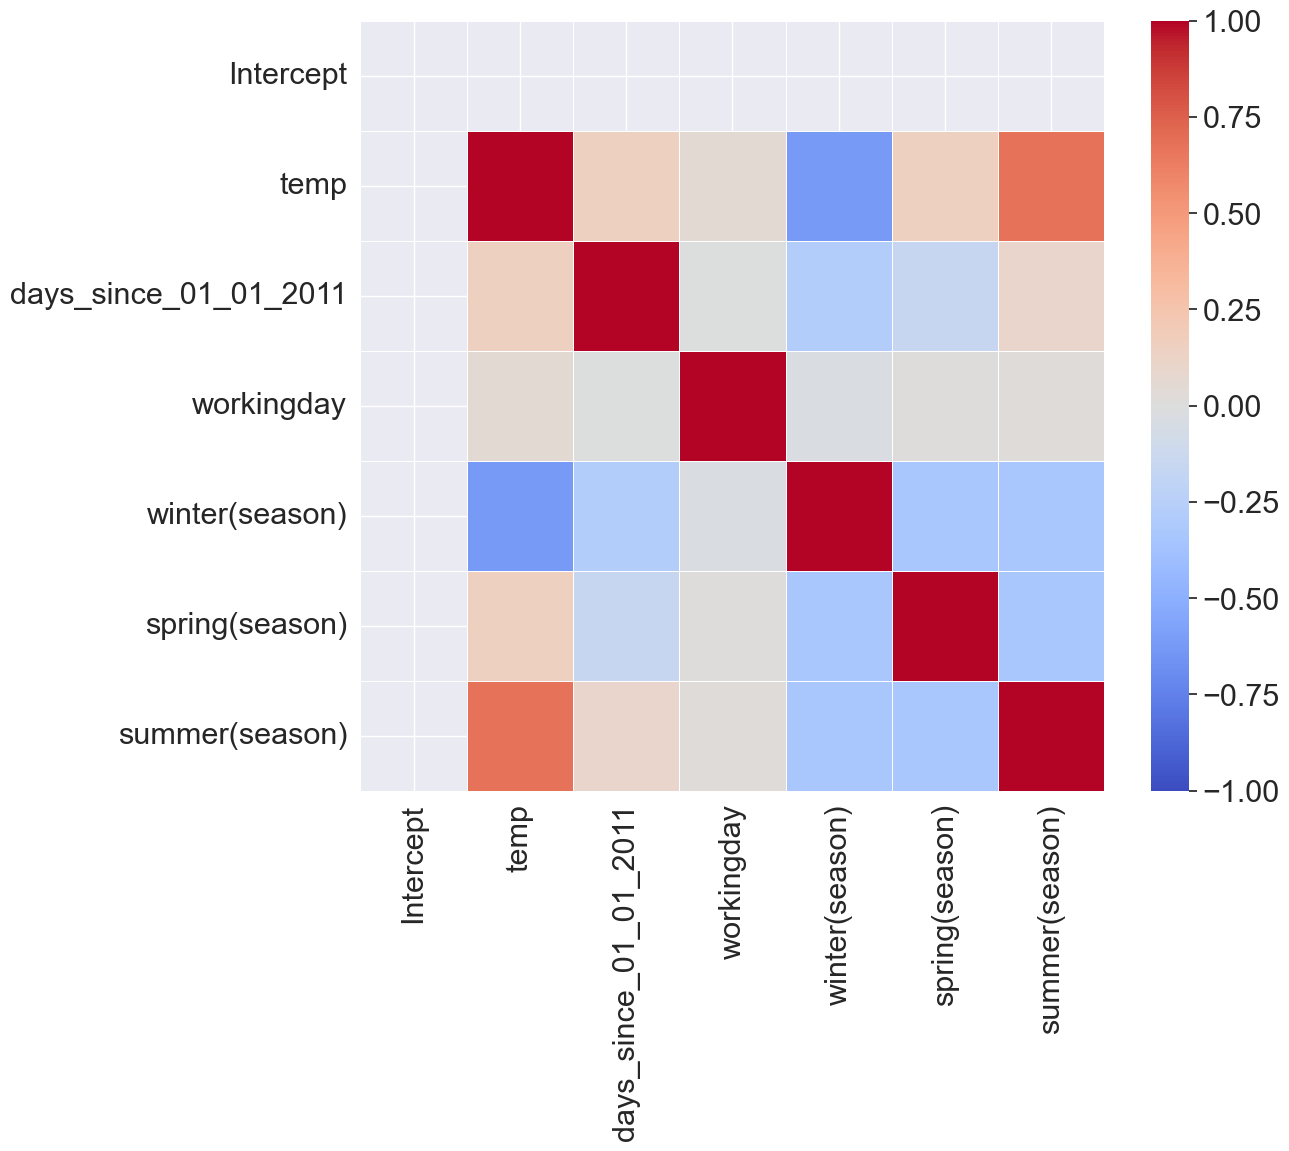

In [179]:
correlation_heatmap(X)

In [180]:
from sklearn.linear_model import Lasso

In [181]:
clf = Lasso(random_state=1, fit_intercept=False, alpha=1.0)

In [182]:
clf.fit(X, y)

Lasso(fit_intercept=False, random_state=1)

In [183]:
X.columns

Index(['Intercept', 'temp', 'days_since_01_01_2011', 'workingday',
       'winter(season)', 'spring(season)', 'summer(season)'],
      dtype='object')

In [184]:
after 

NameError: name 'after' is not defined

Q: Look at the coefficient of the `is_summer` feature, can you interpret it as: **compared to `is_fall` people tend to rent 120 bikes less**? Why is that problematic? Hint: What is high in the summer?

The interpretation is problematic because the negative coefficient suggests that summer has a negative impact on bike rental demand, which is not consistent with dataset. In reality, bike rentals are often high during the summer due to good weather and increased outdoor activity. Therefore, the negative coefficient for summer(season) might indicate the presence of some confounding variables that are not included in the model, leading to a biased estimate of the effect of summer on bike rentals.


# Homework

## 1.1 
Create a function that receives a boolean `standardize` and returns a tuple `X,y` where
- y: is the number of rented bikes for a day
- X: is the temperature of that day, the windspeed, the days since 01.01.2011, and the humidity. Finally, there should also be an intercept term. Make sure to add them in this order.
- If `standardize` is `True`, then the temperature, windspeed, days since 01.01.2011 and teh humidity should be standardized (but not the intercept or the target variable)

In [185]:
bike_data.df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'days_since_01_01_2011'],
      dtype='object')

In [186]:
def ex_1_1(standardize: bool) -> tuple[np.array, np.array]:
    
    with contextlib.redirect_stdout(None):
        # in here nothing gets printed
        
        bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
        bike_data.add_target("cnt")
        
        
        bike_data.add_feature("temp")
        bike_data.add_feature("windspeed")
        bike_data.add_feature("days_since_01_01_2011")
        bike_data.add_feature("hum")
        bike_data.intercept = True
       
        def standardize_fun(df):
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
            df[['temp', 'windspeed', 'days_since_01_01_2011', 'hum']] = scaler.fit_transform(df[['temp', 'windspeed', 'days_since_01_01_2011', 'hum']])
            return df 
    
    
    return bike_data.return_Xy(transform_before=standardize_fun if standardize else None)


In [187]:
compare("ex_1_1", ex_1_1)

Great work!


## 1.2
Create a function that excepts the L1-regularisation parameter `alpha` and a boolean `standardize` and fits a `Lasso`-Regressor with `random_state`=1 and `fit_intercept`=False on the, depending on the input, **standardized** dataset of `ex_1_1`. It should return the number of rescale-R2-score where the number of features is equal to the number of non-zero weights. You can find the required formula on page 40 of the interpretable ML book (https://christophm.github.io/interpretable-ml-book/interpretable-ml.pdf).

You may re-use the function `ex_1_1` inside `ex_1_2`.

Bonus (technical programming stuff): Why might it be beneficial to import `Lasso` **inside** the function, and also define everything you need **inside** that function? 

Answer: Python allows the users who can import the libs in the functions (many languages cannot do the same such as: C/C++ ...). Hence, it might be benetical to import Lasso and everything we need inside the function, to avoid making my global namespace chaos (polluting the global namespace) and make the function more self-contained and easier to maintain the code.  It also makes it easier to reuse the function in other files(screnario, context) without worrying about the confliction of name or dependencies."


In [188]:
def ex_1_2(alpha: float, standardize: bool) -> (float, np.array):
    
    import numpy as np 
    from sklearn.linear_model import Lasso
    from sklearn.metrics import r2_score
    
    X, y = ex_1_1(standardize) # (1)
    
    def scaled_r2_score(y_true, y_pred, p, n):
        #calculate r2
        r2 = r2_score(y_true, y_pred)
        scaled_r2_score = 1 - (1-r2)*(n-1)/(n-p-1)
        return scaled_r2_score
    
    #to get the value of scaled_r2_score we need to know p,n, y_true, y_pred. We know only y_true is y from (1)
    
    model = Lasso(alpha=alpha, random_state=1, fit_intercept=False)
    #train the model
    model.fit(X, y)
    #get the coefficient 
    coef = model.coef_
    #calculate p, note that p is sum of coefficentes that are != 0
    p = np.sum( coef != 0)
    #get n, it is the number of data points
    n = X.shape[0]
    #finally, get ypred, provided by predict method of Lasso model
    y_pred = model.predict(X)
    

    # calculate and return scaled R2 score and coefficients, as the requirements
    return scaled_r2_score(y, y_pred, p, n), coef


In [189]:
compare("ex_1_2", ex_1_2)

Great work!


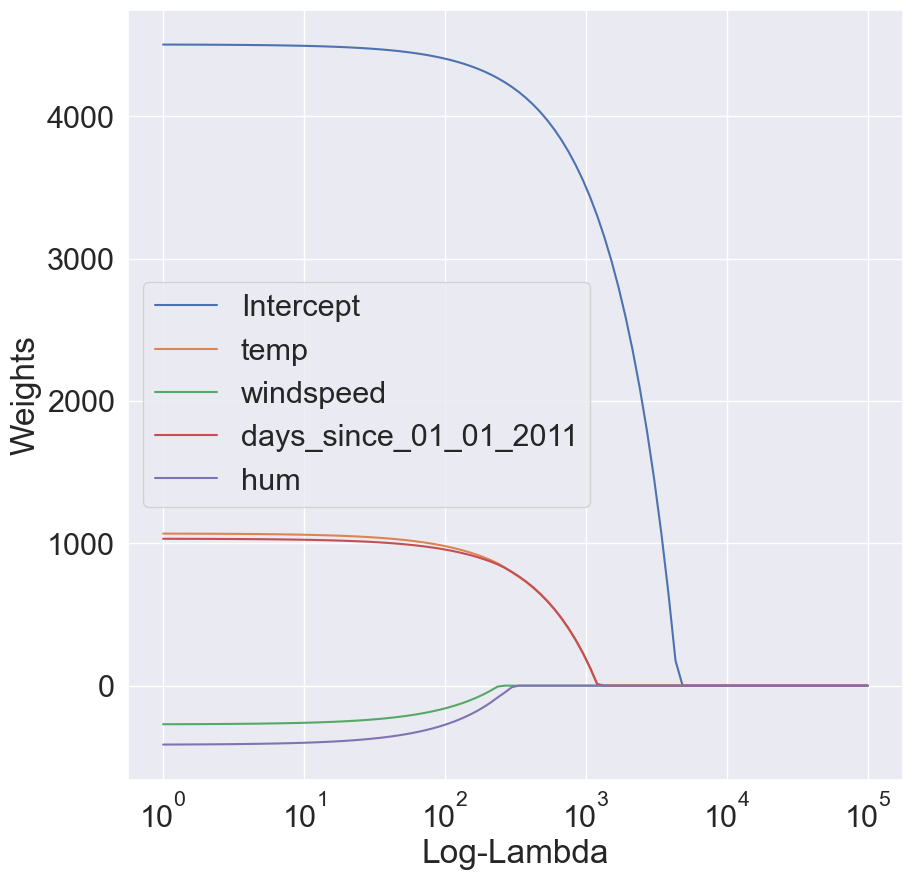

In [190]:
def create_lasso_regularisation_plot(ex_1_2):
    alphas = np.logspace(0, 5, 100)
    
    X, y = ex_1_1(True)
    ex_1_2_out = list(map(lambda a: list(ex_1_2(a, True)), alphas))
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xscale('log')

    for i,feature_name in enumerate(X.columns):
        plt.plot(alphas, [ex_1_2_out[a][1][i] for a in range(len(alphas))], label=feature_name)

    plt.legend()
    plt.xlabel("Log-Lambda")
    plt.ylabel("Weights")
    return 

#TODO: uncomment this
create_lasso_regularisation_plot(ex_1_2)

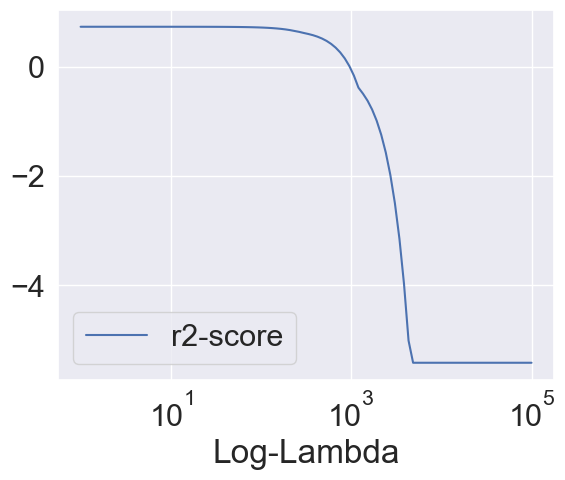

In [191]:
def create_r2_score_plot(ex_1_2):
    alphas = np.logspace(0, 5, 100)
    
    ex_1_2_out = list(map(lambda a: list(ex_1_2(a, True)), alphas))
    plt.plot(alphas, [ex_1_2_out[a][0] for a in range(len(alphas))], label="r2-score")
    ax = plt.gca()
    ax.set_xscale('log')
    plt.legend()
    plt.xlabel("Log-Lambda")
    
#TODO: uncomment this
create_r2_score_plot(ex_1_2)

Q: What does the r2-score tell you if it passes the x-axis, i.e. if it becomes lower than zero?

A: The R2 score is a statistical measure that is used to evaluate how well the machine learning model is able to predict the target variable using different values of alpha. 
Hence, if it becomes negative, R2 score suggests that the model is performing poorly and is not able to explain any of the variability in the target variable. In other word, the model is no better than a constant. This may indicate that the model is overfitting or underfitting the data, or that there are issues with the data itself.



## 1.3 

Use the function `naive_effect_plot` to generate an effect plot of the Lasso-Algorithm with `alpha`=1.0 and `random_state`=1 and trained on the **not standardized** dataset from exercise `1_1`.
Where in this effect plot would the datapoint with the lowest rented bikes and the highest rented bikes lie? What is the feature in which these two datapoins differ the most? 
Write a function that returns the effect difference between these two data points for this feature.

In [192]:
import copy
def naive_effect_plot(X, y, coef):
    """
    Make sure that X is *not* standardized. This would defeat the purpose of an effect plot!
    """
    
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    vary_features = {}
    
    steps=3
    for col in X.columns:
        X_grid = []
        for a in np.linspace(-1,1,steps):
            Xtemp = copy.copy(Xmean)
            Xtemp[:] = 0
            Xtemp[col] = Xmean[col]+a*Xstd[col]
            X_grid.append(Xtemp)
        # prediction + intercept
        y_grid = np.dot(np.array(X_grid), coef)
        vary_features.update({col: y_grid})
    
    pd.DataFrame(vary_features).boxplot(vert=False)
    plt.xlabel(y.columns[0])
    plt.ylabel("features")
    plt.show()


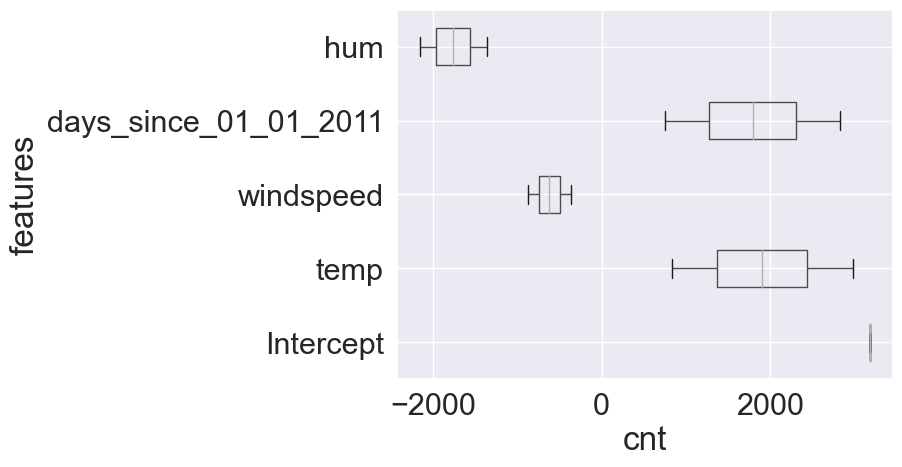

In [193]:
#TODO: uncomment this
X, y = ex_1_1(False)
_, coef = ex_1_2(1.0, False)

naive_effect_plot(X, y, coef)

In [194]:
def ex_1_3() -> float:
    X, y = ex_1_1(False)
    _, coef = ex_1_2(1.0, False)
    
    #  because y contains only cnt column,so we can find the index where the min value of cnt:
    min_idx = np.argmin(y)
    #if y contains more than 1 column then  min_idx = y['cnt'].idxmin()
    print("min y ", y.loc[min_idx, 'cnt'])
    #Similarly, find the index where h the maximum value of cnt is:
    max_idx = np.argmax(y)
    
    # get the row with the minimum value of cnt
    X_min = X.iloc[min_idx]
   
    
    # get the row with the maximum value of cnt
    X_max = X.iloc[max_idx]
    
    
    """ This block codes does not have any relevant to the ex_1_3.
    They were used to see the relation between temp and cnt
    
    mask = (19 <= X['temp']) & (X['temp'] <= 22)
    X_masked = X.loc[mask]
    y_masked = y.loc[mask]

    result = pd.concat([X_masked, y_masked], axis=1)
    result_sorted = result.sort_values('cnt', ascending=True)
    print(result_sorted)
    """
    
    # calculate the effect difference for each feature
    effects = []
    for i, col in enumerate(X.columns):
        # calculate the effect of the feature for the minimum and maximum data points
        effect_min = coef[i] * (X_min[col] - X[col].mean())        
        
        effect_max = coef[i] * (X_max[col] - X[col].mean())
        # calculate the effect difference between the two data points
        effect_diff = abs(effect_max - effect_min)
        effects.append(effect_diff)
    
    # find the index of the largest effect difference
    max_effect_idx = np.argmax(effects)
    # return the max effect difference
    return effects[max_effect_idx]

In [195]:
compare("ex_1_3", ex_1_3)

Great work!


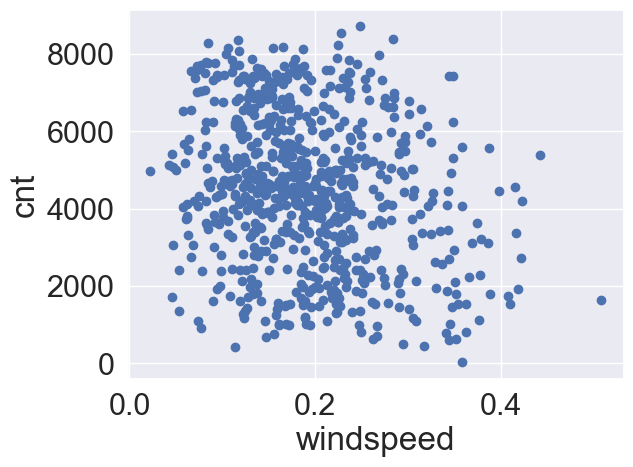

In [196]:
import matplotlib.pyplot as plt

plt.scatter(X['windspeed'], y['cnt'])
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()

In [197]:
#TODO: uncomment this
ex_1_3()

min y  22.0


1060.705332743288

Q: What did you think was going on that day? How could you check? What other features are there that we haven't used?
A: The relationship between weather variables and bike sharing usage can be complex and nonlinear, making it difficult to answer this question exactly. However, from the data we can see that on the day when the minimum bike rental count was recorded (22), the temperature was low at only 12.68 degrees Celsius, and the humidity and wind speed were very high (0.880000 and 0.358200, respectively), even though they were not the highest, they still belong to the top 5.

On the other hand, on the day when the highest bike rental count was recorded, the temperature was ideal at 20.59165 degrees Celsius, the wind speed was low at only 0.247521, and the humidity was moderate at 0.50167.

It is important to note that at least 5 features were not used in this analysis (season, month, holiday, weekday, weathersit and workingday), which could also potentially affect the number of bike rentals. Therefore, a more comprehensive analysis may be needed to fully understand the relationship between weather variables and bike sharing usage.


## 1.4

Maybe people care less about temperature if they have to get to work and rent a bike regardless. How can we check that? -> By adding an interaction feature between `temp` and `workingday`

First, make a new dataset `cnt ~ 1 + temp + workingday + interaction(temp, workingday)`. No standardisation of the temperature feature!

Your interaction function should have the effect that your linear model can fit two different weights/slopes for the temperature feature depending on whether or not the day was a workingday.

Then write a function that fits a simple Linear Regression model (not LASSO!) on the dataset and outputs a tuple of floats where the first is the increase of number of rented bikes per degree if workingday, and the second float is the increase of number of rented bikes per degree if not a working day

In [198]:
def ex_1_4() -> tuple[float, float]:
    # Define the interaction feature function
    def interaction(temp, workingday):
        #remember that: workingday is 1, non-workingday is 0
        return temp * workingday

    # Load the bike data
    bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv", include_intercept_feature=True)
    bike_data.add_target("cnt")
    bike_data.add_feature("temp")    
    bike_data.add_feature("workingday")    
    #add interaction
    bike_data.add_function_feature(interaction, "temp", ["workingday"])
    
    X, y = bike_data.return_Xy()    
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # Get the coefficients 
    coef = model.coef_[0]  
   
    
    #the increase of number of rented bikes per degree if workingday
    w_temp = coef[1] + coef[3]
    w_temp_not_workingday = coef[1]
    
    return w_temp, w_temp_not_workingday

In [199]:
compare("ex_1_4", ex_1_4)

Great work!


In [200]:
w_of_temp_if_is_workingday, w_of_temp_if_isnt_workingday = ex_1_4()

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ 1 + temp )
FeatureModel(cnt ~ 1 + temp + workingday )
FeatureModel(cnt ~ 1 + temp + workingday  + interaction(temp,workingday))


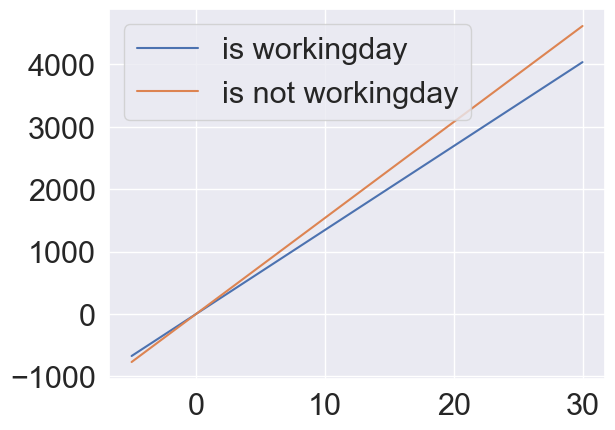

In [201]:
temps = np.linspace(-5, 30, 100)
plt.plot(temps, w_of_temp_if_is_workingday*temps, label="is workingday")
plt.plot(temps, w_of_temp_if_isnt_workingday*temps, label="is not workingday")
plt.legend()
plt.show()

## 1.5
Up to this point we have only considered modeling a linear dependence for the target variable of the temperature feature. It seems more natural that this effect saturates at higher temperatures (people find it too warm to ride a bike). Let's try to capture this by expanding up our one temperature feature into many different features using smooth basis functions. This class of model is called a linear additive model.

Write a function that as input takes the scale parameter `s` and a list of floats called `centers` and then it first creates the following dataset `cnt ~ 1 + temp  + gaussian(temp,centers[0],s) + gaussian(temp,centers[1],s) + ... + gaussian(temp,centers[-1],s)` where the function `gaussian` is given by 

$$g(t, c, s) = \exp({-\frac{(t-c)^2}{s^2}})$$
and where the center and s
cale parameter $s$ are given by the function input.

Then, the function should fit a Linear Regression and return the coefficients/weights.

In [202]:
def ex_1_5(centers: list[float], scale: float) -> np.ndarray:
    # we just make this function global so that we can re-use it out of scope (without passing it)
    #global gaussian
    
    def gaussian(temp, center, scale=scale):
        return np.exp(-((temp - center)**2) / (scale**2))

    bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv", include_intercept_feature=True)
    bike_data.add_target("cnt")
    bike_data.add_feature('temp')
    for center in centers:
        bike_data.add_function_feature(gaussian, "temp", [[center, scale]])
   
    
    X, y = bike_data.return_Xy()

    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    
    return model.coef_



In [203]:
ex_1_5([1,2,3,4], 1.2)

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ 1 + temp )
FeatureModel(cnt ~ 1 + temp  + gaussian(temp,1,1.2))
FeatureModel(cnt ~ 1 + temp  + gaussian(temp,1,1.2) + gaussian(temp,2,1.2))
FeatureModel(cnt ~ 1 + temp  + gaussian(temp,1,1.2) + gaussian(temp,2,1.2) + gaussian(temp,3,1.2))
FeatureModel(cnt ~ 1 + temp  + gaussian(temp,1,1.2) + gaussian(temp,2,1.2) + gaussian(temp,3,1.2) + gaussian(temp,4,1.2))


array([[ 2828.98084214,   118.41110496, -1615.85391418,    91.98036846,
         -909.65607648,  -643.56286938]])

In [204]:
compare("ex_1_5", ex_1_5)

Great work!


In [205]:
def plot_temperature_dependence(coef, centers):
    temps = np.linspace(-5, 30, 100)
    gaussian_prediction = coef[:, 2:]@np.array(list(map(lambda center: gaussian(temps, center), centers)))
    linear_prediction = coef[:, 1]*temps
    intercept = coef[:, 0]
    plt.plot(temps, gaussian_prediction[0]+linear_prediction+intercept)
    plt.xlabel("Temperature [deg]")
    plt.ylabel("cnt")

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ 1 + temp )


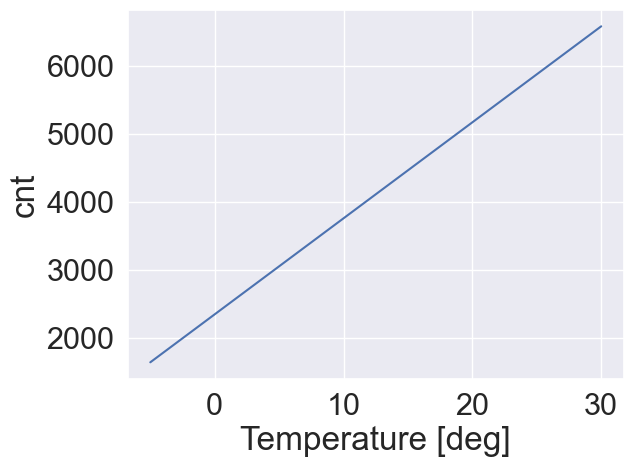

In [206]:
#TODO
centers = []
scale=5
#TODO: uncomment this
plot_temperature_dependence(ex_1_5(centers, scale), centers)

In [212]:
from ce1_compare import scores, grade
scores

{'ex_1_1': True,
 'ex_1_2': True,
 'ex_1_3': True,
 'ex_1_4': True,
 'ex_1_5': True}

In [210]:
#TODO: run this
write_submission_txt()

In [211]:
grade("ce1_Thao_Nguyen Van.txt")

'100.0% are correct'